# Implementation of PCAIME using AutoMPGData
- This is an example of implementing PCAIME(Principal Component Analysis-Enhanced Approximate Inverse Model Explanations) using AutoMPGData.
- If you use this software for research or other purposes, please cite the following paper
```
@ARTICLE{10247033,
author={Nakanishi, Takafumi},
journal={IEEE Access},
  title={Approximate Inverse Model Explanations (AIME): Unveiling Local and Global Insights in Machine Learning Models},
  year={2023},
  volume={11},
  number={},
  pages={101020-101044},
 doi={10.1109/ACCESS.2023.3314336}}
```
```
@ARTICLE{10648696,
  author={Nakanishi, Takafumi},
  journal={IEEE Access},
  title={PCAIME: Principal Component Analysis-Enhanced Approximate Inverse Model Explanations Through Dimensional Decomposition and Expansion},
  year={2024},
  volume={12},
  number={},
  pages={121093-121113},
  keywords={Correlation;Analytical models;Principal component analysis;Feature extraction;Artificial intelligence;Estimation;Dimensionality reduction;Explainable AI;Approximation methods;Approximate inverse model explanation;explainable artificial intelligence;feature correlation;feature importance;model explanation;principal component analysis;principal component analysis-enhanced approximate inverse model explanation},
  doi={10.1109/ACCESS.2024.3450299}}
```

## Dataset
- Auto MPG
- Quinlan,R.. (1993). Auto MPG. UCI Machine Learning Repository. https://doi.org/10.24432/C5859H.

In [1]:
import pandas as pd
# Auto MPGデータセットのURL
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

# カラム名
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

# データセットの読み込み
df = pd.read_csv(url, names=column_names, na_values="?", comment='\t',
                 sep=" ", skipinitialspace=True)

In [2]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Check for missing values and remove them
missing_values = df.isna().sum()
df_cleaned = df.dropna()

# Features to be scaled
features_to_scale = ['Displacement', 'Horsepower', 'Weight', 'Acceleration']
scaler = StandardScaler()

# Fit the scaler to the features and transform
scaled_features = scaler.fit_transform(df_cleaned[features_to_scale])

# Create a DataFrame from the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)

# DataFrameのコピーを明示的に作成
df_cleaned = df.dropna().copy()

# 以下のコードは同じDataFrameに対して操作を行うため、警告は表示されない
df_cleaned.drop(columns=features_to_scale, inplace=True)

# Concatenate the scaled features with the rest of the DataFrame
df_final = pd.concat([df_cleaned.reset_index(drop=True), scaled_df.reset_index(drop=True)], axis=1)

# Now 'df_final' should contain all the original columns with the selected features scaled
df_final.head()


,MPG,Cylinders,Model Year,Origin,Displacement,Horsepower,Weight,Acceleration
0,18.0,8,70,1,1.077290,0.664133,0.620540,-1.285258
1,15.0,8,70,1,1.488732,1.574594,0.843334,-1.466724
2,18.0,8,70,1,1.182542,1.184397,0.540382,-1.648189
3,16.0,8,70,1,1.048584,1.184397,0.536845,-1.285258
4,17.0,8,70,1,1.029447,0.924265,0.555706,-1.829655


In [6]:
df_final

,MPG,Cylinders,Model Year,Origin,Displacement,Horsepower,Weight,Acceleration
0,18.0,8,70,1,1.077290,0.664133,0.620540,-1.285258
1,15.0,8,70,1,1.488732,1.574594,0.843334,-1.466724
2,18.0,8,70,1,1.182542,1.184397,0.540382,-1.648189
3,16.0,8,70,1,1.048584,1.184397,0.536845,-1.285258
4,17.0,8,70,1,1.029447,0.924265,0.555706,-1.829655
...,...,...,...,...,...,...,...,...
387,27.0,4,82,1,-0.520637,-0.480448,-0.221125,0.021294
388,44.0,4,82,2,-0.932079,-1.364896,-0.999134,3.287676
389,32.0,4,82,1,-0.568479,-0.532474,-0.804632,-1.430430
390,28.0,4,82,1,-0.712005,-0.662540,-0.415627,1.110088


## Caluculation of Variance Inflation Factor（VIF）
- Displacement (displacement): VIF is 22.93, which indicates that it is strongly correlated with other variables.
- Weight: VIF is 11.07, which also indicates a strong correlation with other variables.
- Cylinders and Horsepower also show VIF values close to 10, but as they are just slightly below 10, the multicollinearity problem caused by these variables may not be that serious.
- Although const has a very high VIF, this is a constant term (bias) and not an actual feature, so it is not considered as an indicator of multicollinearity affecting the model.
- Model Year, Acceleration, and Origin_2 and Origin_3 (dummy variables for the Origin variable) show relatively low VIF values, indicating that these variables are not strongly correlated with other variables.
- As a consideration, for Displacement and Weight, you could try removing one of these variables from the model, or creating a new feature that combines these variables. For example, you could create a new variable that shows the ratio of displacement to weight, which might reduce multicollinearity while maintaining the accuracy of the model.
- In addition, it is necessary to perform a more detailed analysis of Cylinders and Horsepower to consider how they affect the model. If these variables are not essential to the model, you can consider removing them or re-evaluating their relationship with other variables.

In [7]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# データの型を確認し、数値型に変換
df_with_dummies = pd.get_dummies(df_final, columns=['Origin'], drop_first=True)
X = add_constant(df_with_dummies.drop(['MPG'], axis=1))

# データを明示的に数値型に変換
X = X.astype(float)

# VIFの計算
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Feature,VIF
0,const,678.543083
1,Cylinders,10.737771
2,Model Year,1.301373
3,Displacement,22.937950
4,Horsepower,9.957265
5,Weight,11.074349
6,Acceleration,2.625906
7,Origin_2,1.649271
8,Origin_3,1.762692


## Create Blackbox Model
- implemented by ExtraTreesRegressor

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
import numpy as np
import pandas as pd

# Assuming df_with_dummies is the DataFrame you have mentioned earlier
# Replace this with the actual DataFrame loading if different
# df_with_dummies = ...

# Define X and y
X = df_with_dummies.drop('MPG', axis=1)
y = df_with_dummies['MPG']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train_original = X_train.values.copy()
X_test_original = X_test.values.copy()  # ここを修正
y_train_original = y_train.values.copy()
y_test_original = y_test.values.copy()  # ここを修正

# Initialize and fit the Extra Trees Regressor
extra_trees = ExtraTreesRegressor(random_state=42)
extra_trees.fit(X_train, y_train)

# Predict on the test set
y_pred = extra_trees.predict(X_test)

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Prepare the results in a DataFrame
results = pd.DataFrame({
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse],
    'R2': [r2],
    'RMSLE': [rmsle],
    'MAPE': [mape]
})

results

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.762663,6.364267,2.52275,0.873808,0.100134,7.906338


In [9]:
feature_names=X_train.columns.values

- ExtraTreesRegressor can calculate feature importances.

In [10]:
# 特徴量の重要性をデータフレームに変換して表示
feature_importances = extra_trees.feature_importances_

# DataFrameの作成時にインデックスとして特徴量名を使用
importance_df = pd.DataFrame({'Importance': feature_importances}, index=feature_names)

# 重要度で降順にソート
#importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df.T

,Cylinders,Model Year,Displacement,Horsepower,Weight,Acceleration,Origin_2,Origin_3
Importance,0.313665,0.128451,0.264385,0.119319,0.118427,0.029006,0.008,0.018747


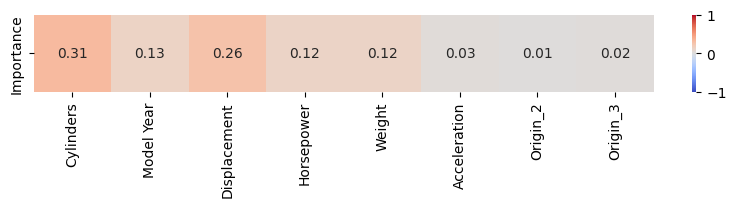

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,1))
sns.heatmap(importance_df.T, cmap='coolwarm', annot=True, fmt=".2f", center=0, vmin=-1, vmax=1,)
plt.show()

## AIME

In [12]:
!pip install aime_xai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.3 MB/s eta 0:00:00


In [13]:
from aime_xai import AIME

In [14]:
y_hat_train=extra_trees.predict(X_train.values).reshape(-1, 1)
y_hat_test=extra_trees.predict(X_test.values).reshape(-1, 1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


In [15]:
explainer = AIME()
explainer.create_explainer(X_train, y_hat_train, normalize=True)

In [16]:
feature_names=X.columns.values

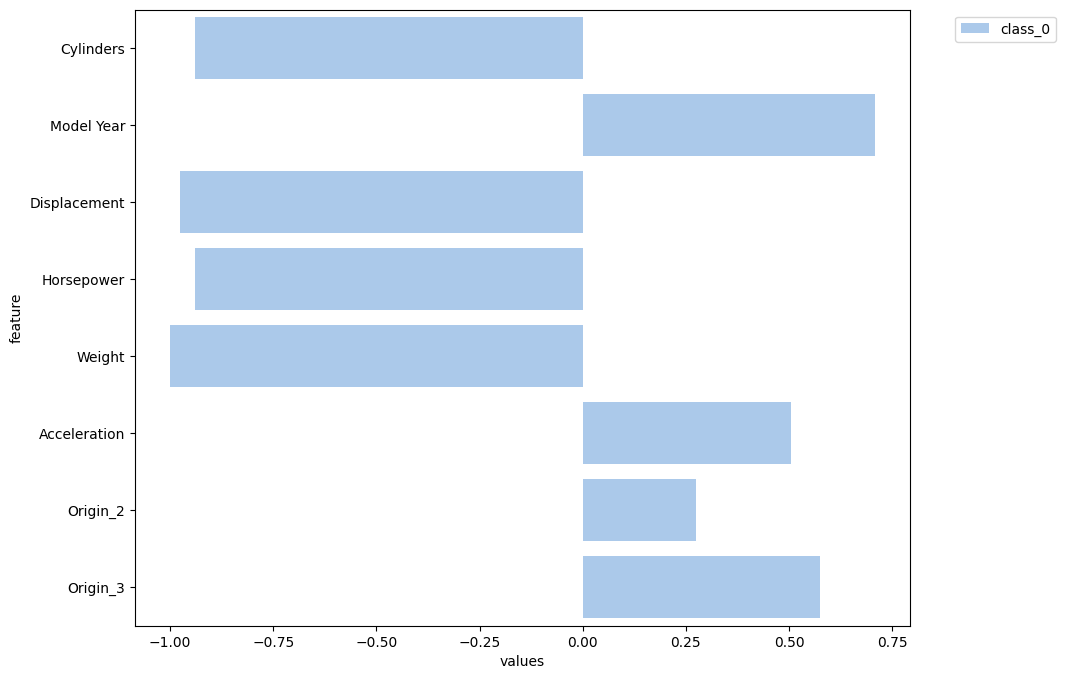

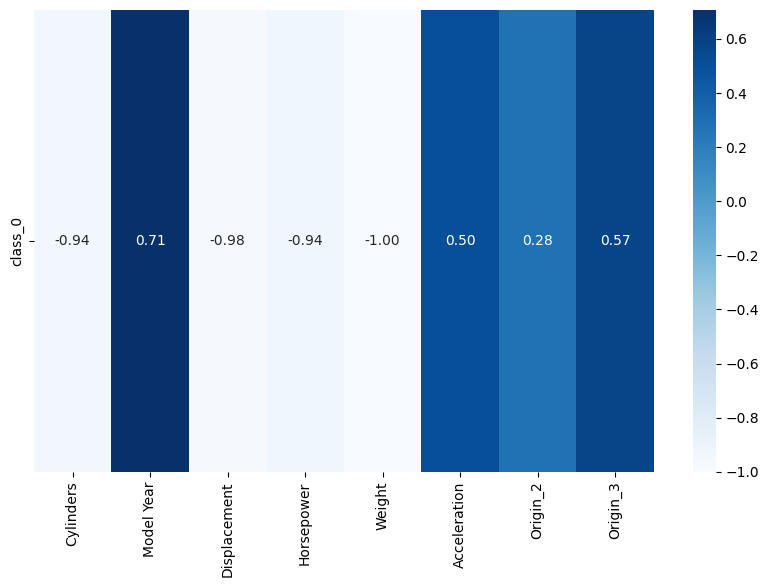

In [17]:
global_importance_df = explainer.global_feature_importance(feature_names=feature_names)

In [18]:
global_importance_df

,Cylinders,Model Year,Displacement,Horsepower,Weight,Acceleration,Origin_2,Origin_3
class_0,-0.940331,0.70706,-0.976793,-0.93877,-1.0,0.504994,0.275062,0.574195


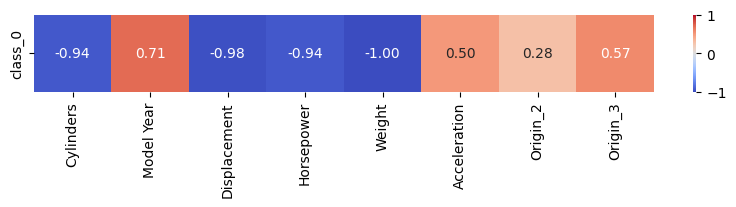

In [19]:
import seaborn as sns
plt.figure(figsize=(10,1))
sns.heatmap(global_importance_df, cmap='coolwarm', annot=True, fmt=".2f", center=0, vmin=-1, vmax=1,)
plt.show()

## Feature Importance Derivation for Multicollinearity by PCAIME

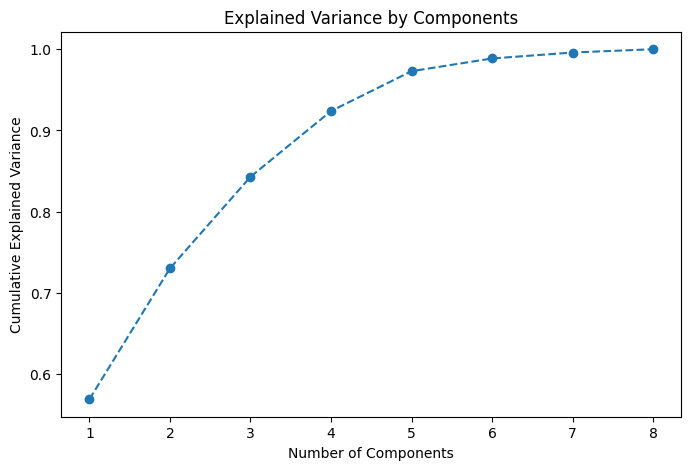

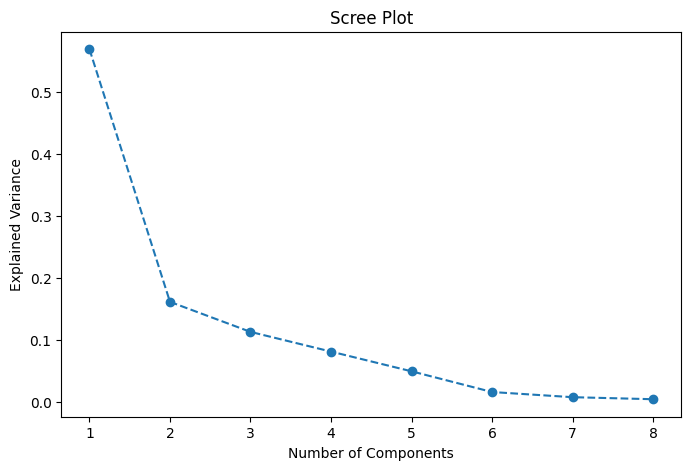

In [20]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X = df_with_dummies.drop('MPG', axis=1)
X_scaled = StandardScaler().fit_transform(X)

# PCA instantiation and fitting
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot of cumulative contribution rate
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Calculate the PCA loadings (components_)
loadings = pd.DataFrame(pca.components_.T[:,:3], columns=['PC1', 'PC2', 'PC3'],
                        index=feature_names)  # feature_names needs to be defined as the list of feature names

loadings

,PC1,PC2,PC3
Cylinders,0.441888,-0.031837,0.151376
Model Year,-0.215359,-0.279799,0.712281
Displacement,0.456884,-0.024683,0.133460
Horsepower,0.442761,-0.040070,-0.106563
Weight,0.434365,0.027966,0.238268
Acceleration,-0.303801,0.144227,0.457488
Origin_2,-0.164807,0.715133,-0.154492
Origin_3,-0.213179,-0.620875,-0.388123


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y = df_with_dummies['MPG']

# Split the data into training and testing sets using only the first 3 PCA components
X_train, X_test, y_train, y_test = train_test_split(X_pca[:, :3], y, test_size=0.25, random_state=42)

In [23]:
from aime_xai import AIME
explainer = AIME()
explainer.create_explainer(X_train, y_hat_train, normalize=True)

In [24]:
feature_names=["PC1","PC2","PC3"]

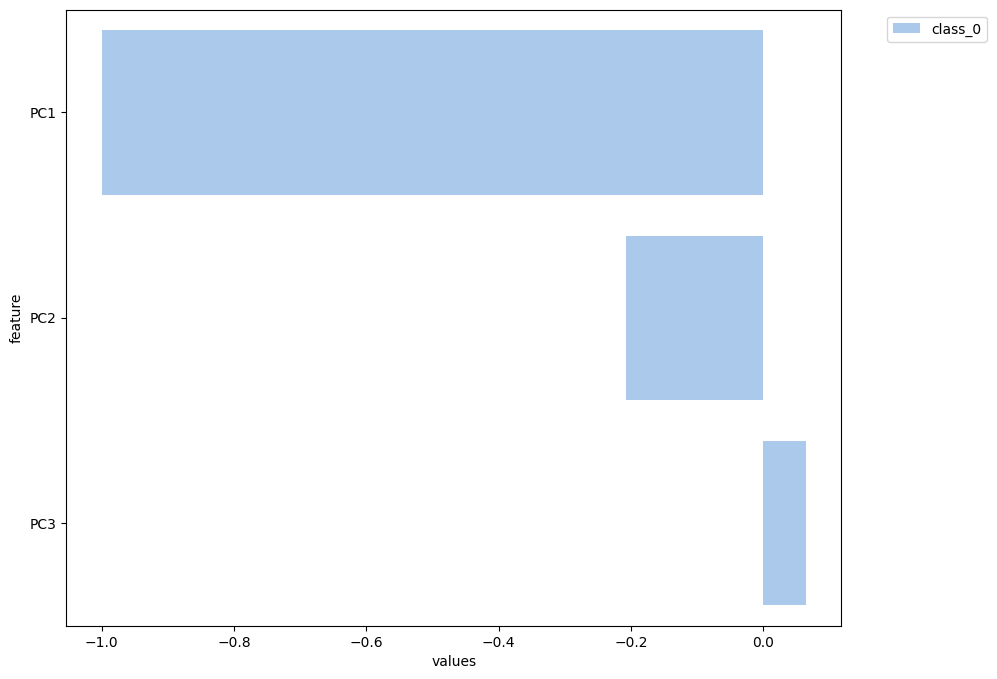

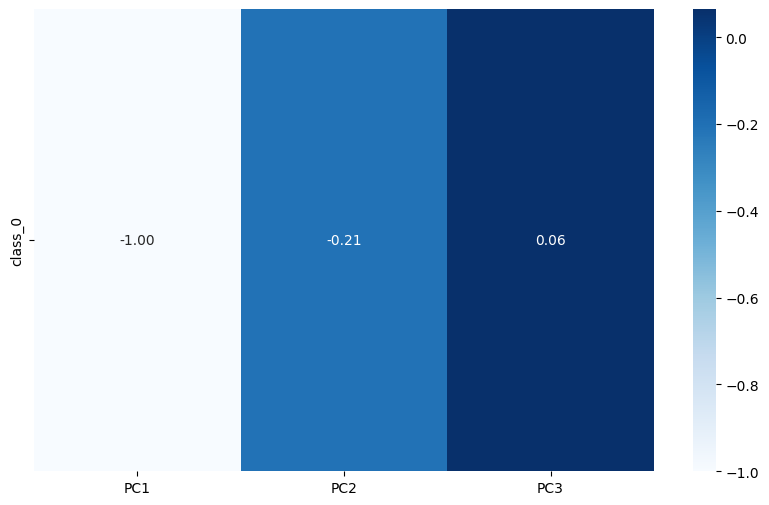

In [25]:
global_importance_df = explainer.global_feature_importance(feature_names=feature_names)

In [26]:
global_importance_df

,PC1,PC2,PC3
class_0,-1.0,-0.207453,0.064565


In [27]:
loadings

,PC1,PC2,PC3
Cylinders,0.441888,-0.031837,0.151376
Model Year,-0.215359,-0.279799,0.712281
Displacement,0.456884,-0.024683,0.133460
Horsepower,0.442761,-0.040070,-0.106563
Weight,0.434365,0.027966,0.238268
Acceleration,-0.303801,0.144227,0.457488
Origin_2,-0.164807,0.715133,-0.154492
Origin_3,-0.213179,-0.620875,-0.388123


In [28]:
adjusted_importance = loadings.multiply(global_importance_df.values, axis=1)
adjusted_importance.T

,Cylinders,Model Year,Displacement,Horsepower,Weight,Acceleration,Origin_2,Origin_3
PC1,-0.441888,0.215359,-0.456884,-0.442761,-0.434365,0.303801,0.164807,0.213179
PC2,0.006605,0.058045,0.005120,0.008313,-0.005802,-0.029920,-0.148357,0.128803
PC3,0.009774,0.045988,0.008617,-0.006880,0.015384,0.029538,-0.009975,-0.025059


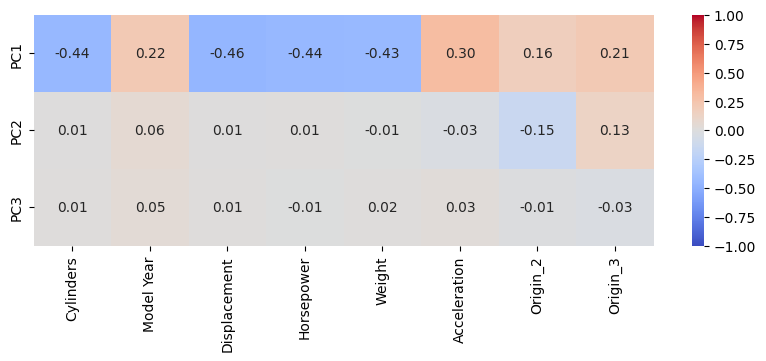

In [29]:
import seaborn as sns
plt.figure(figsize=(10,3))
sns.heatmap(adjusted_importance.T,  cmap='coolwarm', annot=True, fmt=".2f", center=0, vmin=-1, vmax=1,)
plt.show()